<img src="https://www-kiva-org.global.ssl.fastly.net/rgit2a3310b93e9c26beb06ce2915185c0953fc3ba8f/img/kiva_k_cutout_new.jpg" style ="float:right;" width ="50" height = "75">

# <font color ='blue'>KIVA CROWDFUNDING. </font>

# Models to estimate the poverty levels of residents in the regions where Kiva has active loans.

# Assignment 1 

 ### <font color='red'>by James Gikunju Kibugu </font>

### Kiva an online crowdfunding platform is inviting the community to help then build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans. 

### The aim will be to explore the data using Python to help Kiva understand their borrowers and their poverty levels so as to better assess and maximize the impact of their work. Participants should develop their own creative approaches to addressing the objective

##### Problem Statement.
For the locations in which Kiva has active loans, your objective is to pair Kiva's data with additional data sources `to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.` 

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.


This file contains records from the Kiva Data Snapshot and can be matched to the loan theme regions to get a loan’s location.

Column descriptions:

1. id: Unique ID for loan (Loan ID)
2. Loan Theme ID: Unique ID for loan theme
3. Loan Theme Type: General description of the loan theme category
4. Partner ID: Unique ID for field partners (Partner ID)


### 1. INGESTING DATA SETS.

In [1]:
import pandas as pd
import numpy as np

##### 1.1 IMPORTING THAT KIVA LOAN DATA DEALING WITH MISSING VALUES IN IT.

In [5]:
df1=pd.read_csv('KIVA/kiva_loans.csv')
df1.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [6]:
df1.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [160]:
df1.groupby('borrower_genders').sum()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
borrower_genders,,,,,,
female,425124607355,239411095.0,252955025.0,71228999.0,5752346.0,6828587
"female, female",12324012609,7100625.0,7443450.0,2733299.0,167424.0,212270
"female, female, female",11717520494,11743100.0,12281950.0,2491833.0,153434.0,327429
"female, female, female, female",8924438621,10245875.0,10682250.0,1914219.0,98318.0,281078
"female, female, female, female, female",7608816835,9264750.0,9645600.0,1687003.0,85507.0,242532
"female, female, female, female, female, female",2544930694,5106950.0,5334150.0,496741.0,29363.0,119423
"female, female, female, female, female, female, female",2062089147,4941600.0,5121525.0,350873.0,22612.0,114183
"female, female, female, female, female, female, female, female",1848630390,5390650.0,5585600.0,295538.0,21793.0,126711
"female, female, female, female, female, female, female, female, female",1160550461,3397075.0,3534850.0,198126.0,15972.0,81692


In [7]:
df1['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [159]:
df1['borrower_genders'].unique()

array(['female', 'female, female', 'female, female, female', ...,
       'female, female, male, female, female, female, female, female, female, female, male, male, female, female, male, female, female, female, female, female, female, female',
       'male, female, female, female, female, female, female, female, male, male, female, male, female, male, male, male',
       'female, female, female, male, female, female, female, male, female, female, female, male, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male'],
      dtype=object)

In [9]:
df1.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [10]:
df1.nunique()

id                    671205
funded_amount            610
loan_amount              479
activity                 163
sector                    15
use                   424912
country_code              86
country                   87
region                 12695
currency                  67
partner_id               366
posted_time           667399
disbursed_time          5719
funded_time           498007
term_in_months           148
lender_count             503
tags                   86719
borrower_genders       11298
repayment_interval         4
date                    1298
dtype: int64

In [11]:
df1.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

There are a no of  missing value on the Country code and we will try and indentify the missing values in so that we can replace with the correct country code.


In [12]:
# select 3 columns so that we can know the missing country names and its respective country code.
df=df1[['country_code','country','id']]

In [13]:
null_data = df[df.isnull().any(axis=1)]
null_data

,country_code,country,id
202537,NaN,Namibia,851360
202823,NaN,Namibia,851368
344929,NaN,Namibia,991853
351177,NaN,Namibia,998555
420953,NaN,Namibia,1068167
421218,NaN,Namibia,1068159
487207,NaN,Namibia,1147852
487653,NaN,Namibia,1147866


In [14]:
# Nambia country code is NA so let us replace the missing values.
df1['country_code']=df1['country_code'].fillna('NA')

In [15]:
df1.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               0
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [16]:
# indentify the region missing values and try and replace them.
df_reg=df1[['country','region']]

In [17]:
null_reg = df_reg[df_reg.isnull().any(axis=1)]
null_reg['region']=null_reg['region'].fillna(1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
null_reg.groupby('country')[['region']].sum()

,region
country,
Albania,315
Armenia,5
Azerbaijan,170
Belize,2
Benin,495
Bhutan,1
Bolivia,97
Brazil,41
Burkina Faso,6


#### Try replace the missing value on the partner id using the partner id in the Loan theme my region. 

In [19]:
# Replace the missing value on the partner id using the partner id in the Loan theme ny region.
df_pa_id=df1[['id','partner_id']]

null_pa_id=df_pa_id[df_pa_id.isnull().any(axis=1)]
null_pa_id.head()

,id,partner_id
5,1080148,NaN
67,1080150,NaN
99,1080153,NaN
114,1080151,NaN
195,1080149,NaN


##### Our conclusion on the partner ID  is that there is no partner id was recorded on the loan theme and loan data so that we cannot replace or deal with that missing value

In [20]:
df1['id'].count()

671205

##### 1.2 IMPORTING THE KIVA MPI REGION AND LOCATION.

In [21]:
df2=pd.read_csv('KIVA/kiva_mpi_region_locations.csv')
df2.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [22]:
df2.columns

Index(['LocationName', 'ISO', 'country', 'region', 'world_region', 'MPI',
       'geo', 'lat', 'lon'],
      dtype='object')

In [23]:
df2.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

##### 1.3  LOAN THEME AND THE IDS OF THE LOANEES.

In [24]:
df3=pd.read_csv('KIVA/loan_theme_ids.csv')
df3.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [25]:
df3.isnull().sum()

id                     0
Loan Theme ID      14813
Loan Theme Type    14813
Partner ID         14813
dtype: int64

In [26]:
# no of loan theme type.
df3['Loan Theme Type'].nunique()

203

In [27]:
df3['id'].count()

779092


##### 1.4 IMPORTING THE LOAN THEME BY REGION DATA SET AND DEAL WITH ANY MISSING:


In [28]:
df4=pd.read_csv('KIVA/loan_themes_by_region.csv')
df4.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [29]:
df4.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [30]:
df4.isnull().sum()

Partner ID                0
Field Partner Name        0
sector                    0
Loan Theme ID             0
Loan Theme Type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
ISO                      14
number                    0
amount                    0
LocationName              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

In [31]:
df4[['ISO','country']].isnull().sum()

ISO        14
country     0
dtype: int64

In [32]:
df4[['ISO','country']].head()

,ISO,country
0,KHM,Cambodia
1,KHM,Cambodia
2,KHM,Cambodia
3,KHM,Cambodia
4,KHM,Cambodia


In [33]:
df_ISO=df4[['country','ISO']]

null_ISO=df_ISO[df_ISO.isnull().any(axis=1)]
null_ISO

,country,ISO
12101,Kosovo,NaN
12102,Kosovo,NaN
12103,Kosovo,NaN
12104,Kosovo,NaN
12105,Kosovo,NaN
12106,Kosovo,NaN
12107,Kosovo,NaN
12108,Kosovo,NaN
12109,Kosovo,NaN
12110,Kosovo,NaN


In [34]:
# So the ISO for Kosovo is RKS and for Cote D ivore is CIV. So we replace any missing value in KOsovo and Cote D ivore with their respective.
df4.loc[df4['country'] == 'Kosovo', 'ISO'] = 'RKS'


In [35]:
df4.loc[df4["country"] == "Cote D'Ivoire", 'ISO'] = 'CIV'

In [36]:
df4.isnull().sum()

Partner ID                0
Field Partner Name        0
sector                    0
Loan Theme ID             0
Loan Theme Type           0
country                   0
forkiva                   0
region                    0
geocode_old           14536
ISO                       0
number                    0
amount                    0
LocationName              0
geocode                2074
names                  2075
geo                       0
lat                    2074
lon                    2074
mpi_region               14
mpi_geo                6065
rural_pct              1392
dtype: int64

In [37]:
df_region=df4[['country','geo','mpi_region']]
null_region=df_region[df_region.isnull().any(axis=1)]
null_region.head()

,country,geo,mpi_region
12101,Kosovo,"(42.3701844, 21.1483281)",NaN
12102,Kosovo,"(42.3701844, 21.1483281)",NaN
12103,Kosovo,"(42.3701844, 21.1483281)",NaN
12104,Kosovo,"(42.6374365, 21.0931113)",NaN
12105,Kosovo,"(42.6014008, 21.1918761)",NaN


#### 2. MERGING THE DATA MERGES  

Merge the database between based on the regions and the loanees. So we merge the Loanees details and the loanee theme and id and loanee theme with the region. the

In [95]:
#The first data that we need to merge that have the same unique indentifier is the loan and the loan theme df1 and df2.
df13=pd.merge(df1,df3, on = 'id')
df13.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
0,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
1,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,a1050000002VkWz,Underserved,334.0
2,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
3,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,a1050000000wf22,General,245.0
4,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01,NaN,NaN,NaN


In [97]:
df13.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID'],
      dtype='object')

In [98]:
df13['id'].count()

671199

In [99]:
df13.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'Loan Theme ID', 'Loan Theme Type', 'Partner ID'],
      dtype='object')

In [100]:
df13.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4231
country_code               0
country                    0
region                 56799
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48330
term_in_months             0
lender_count               0
tags                  171411
borrower_genders        4220
repayment_interval         0
date                       0
Loan Theme ID          13507
Loan Theme Type        13507
Partner ID             13507
dtype: int64

In [101]:
df13[['id','partner_id','Partner ID']].head()

,id,partner_id,Partner ID
0,653053,247.0,247.0
1,653068,334.0,334.0
2,653063,247.0,247.0
3,653084,245.0,245.0
4,1080148,NaN,NaN


In [94]:
df13.head(3)

0    female
1    female
2    female
Name: borrower_genders, dtype: object

### 1.11 No of Loanees based on the country of origin.

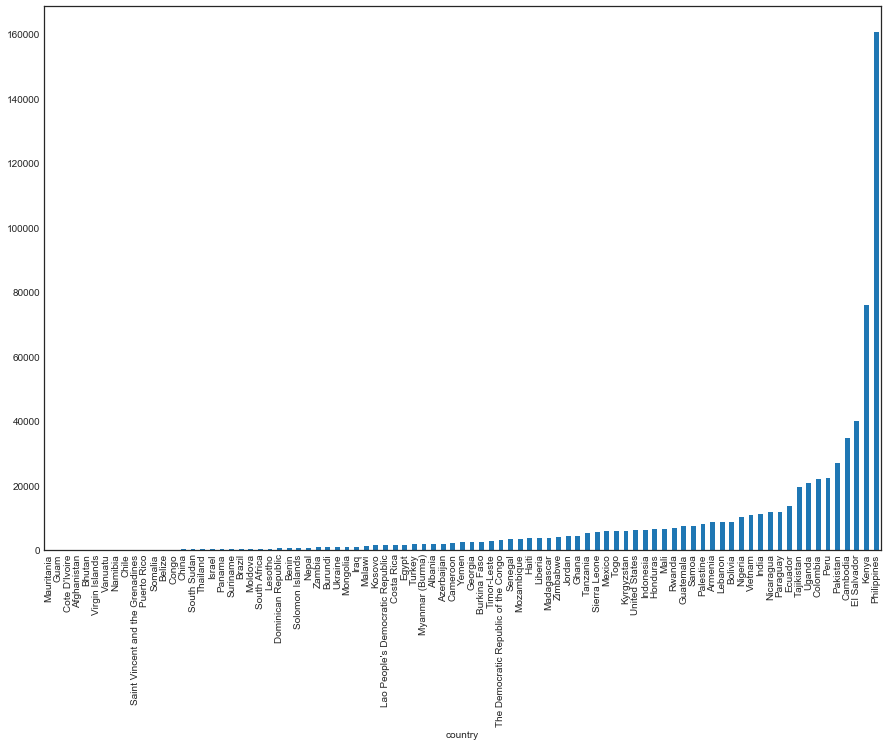

In [347]:
# plot the based on the country of origin..
no_of_loanees=df13.groupby('country')['id'].count()
no_of_loanees.sort_values(ascending=True).plot.bar(figsize=(15,10)) 
 

### `Based on the graph above the highest no of loanees are based in the following 5 countries.`
- Philippines
- Kenya
- El salvador
- Cambodia
- Pakistan `

### 1.12 Segment the loanees based on gender.

In [115]:
# Clean the dgen gender columns particulary the female entries.
df13.borrower_genders.nunique() 

11296

In [155]:
# replace all the commas from the columns
df13['borrower_genders'] = df13['borrower_genders'].str.replace(',', '')


In [156]:
# Replace All repetitives word in a cells. 
df13['borrower_genders'] = df13['borrower_genders'].str.replace(r'\b(\w+)(\s+\1)+\b', r'\1')
df13.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
0,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,female,irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
1,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,a1050000002VkWz,Underserved,334.0
2,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
3,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,a1050000000wf22,General,245.0
4,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01,NaN,NaN,NaN


In [220]:
gender = df13["borrower_genders"].str.split(" ", n = 1, expand = True) 
gender.drop(columns =[1],inplace = True)


,0
0,female
1,female
2,female
3,female
4,female
5,female
6,female
7,female
8,female
9,female


In [222]:
df13['borrower_genders']=gender

In [260]:
df13.groupby('borrower_genders')['id'].sum()

borrower_genders
female    512497874144
male      150592181297
Name: id, dtype: int64

In [247]:
id=[512497874144,150592181297]
borrower_genders=['FEMALE','MALE']

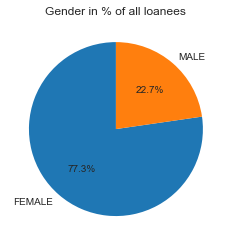

In [248]:
# to show the no of borrowers based on the gender using the pie chart on the percentages.
import matplotlib.pyplot as plt
plt.pie(id, labels=borrower_genders, startangle=90, autopct='%.1f%%')
plt.title('Gender in % of all loanees')
plt.show()

### `Based on the above distribution we conclude that most of the loanees are female. As we have 77.3% of the loanees being women and 22.7% being the males.`

### 1.3 Loanees amount based on the country.

We derive the three columns based on the id , loan amount  country and country currency. Then we convert all the currency in USD.   

In [265]:
# online conversion rates for country currency to usd dollar.
df_e=pd.read_csv('KIVA/Exchange_rate.csv')

In [268]:
# merge the df13 and the exchange rate on the currency
df_loan_amount=df13[['id','country','loan_amount','currency' ]]
df_loan_amount.head()

,id,country,loan_amount,currency
0,653053,Pakistan,575.0,PKR
1,653068,India,150.0,INR
2,653063,Pakistan,200.0,PKR
3,653084,Pakistan,400.0,PKR
4,1080148,Kenya,250.0,KES


In [309]:
df_kiva_currency=df_loan_amount.to_csv(r'Kiva Currency (1).csv', index = False)

In [310]:
df_cure=df_e[['currency','exchange_rate']]
df_cure.head(3)

,currency,exchange_rate
0,AED,3.6725
1,AFN,78.4083
2,XCD,2.7


In [312]:
df_co_loan=pd.read_csv("KIVA/Kiva Currency.csv")

In [313]:
df_co_loan.head()

,id,country,loan_amount,currency,Exchange rate
0,653053,Pakistan,575,PKR,154.865650
1,653068,India,150,INR,71.378850
2,653063,Pakistan,200,PKR,154.865650
3,653084,Pakistan,400,PKR,154.865650
4,1080148,Kenya,250,KES,101.336471


In [314]:
df_co_loan['Loan_amount_in_USD']=df_co_loan['loan_amount']/df_co_loan['Exchange rate']

In [315]:

df_co_loan.head()


,id,country,loan_amount,currency,Exchange rate,Loan_amount_in_USD
0,653053,Pakistan,575,PKR,154.865650,3.712896
1,653068,India,150,INR,71.378850,2.101463
2,653063,Pakistan,200,PKR,154.865650,1.291442
3,653084,Pakistan,400,PKR,154.865650,2.582884
4,1080148,Kenya,250,KES,101.336471,2.467029


In [304]:
df_co_loan2['Loan_amount_in_USD']=df_co_loan2['loan_amount']/df_co_loan['exchange_rate']
df_co_loan2.head()

,id,country,loan_amount,currency,exchange_rate,Loan_amount_in_USD
0,654167,Albania,2450,ALL,108.64,22.551546
1,655765,Albania,2425,ALL,108.64,22.321429
2,655779,Albania,975,ALL,108.64,8.974595
3,656172,Albania,975,ALL,108.64,8.974595
4,656175,Albania,975,ALL,108.64,8.974595


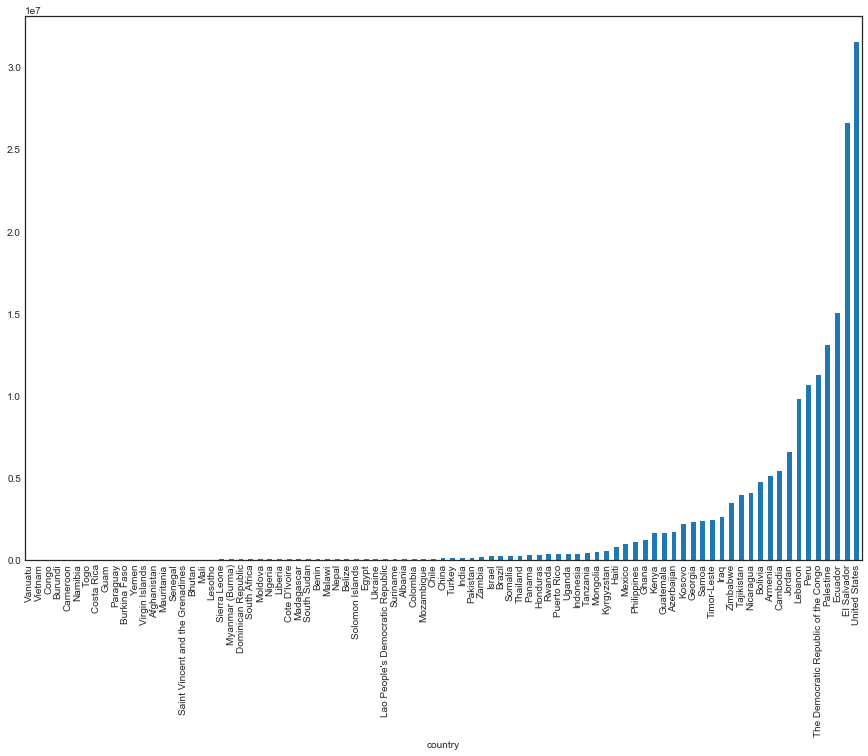

In [377]:
loan_amount=df_co_loan.groupby('country')['Loan_amount_in_USD'].sum()
loan_amount.sort_values(ascending=True).plot.bar(figsize=(15,10)) 

### ` The total Loan distributed to individual  based on the country of the loanees. The following is the top 5 countries that Kiva have invested.`
- United State of America
- El salvador
- Ecuador
- Palestine
- DRC Congo

### `The average loan per individual per country.`

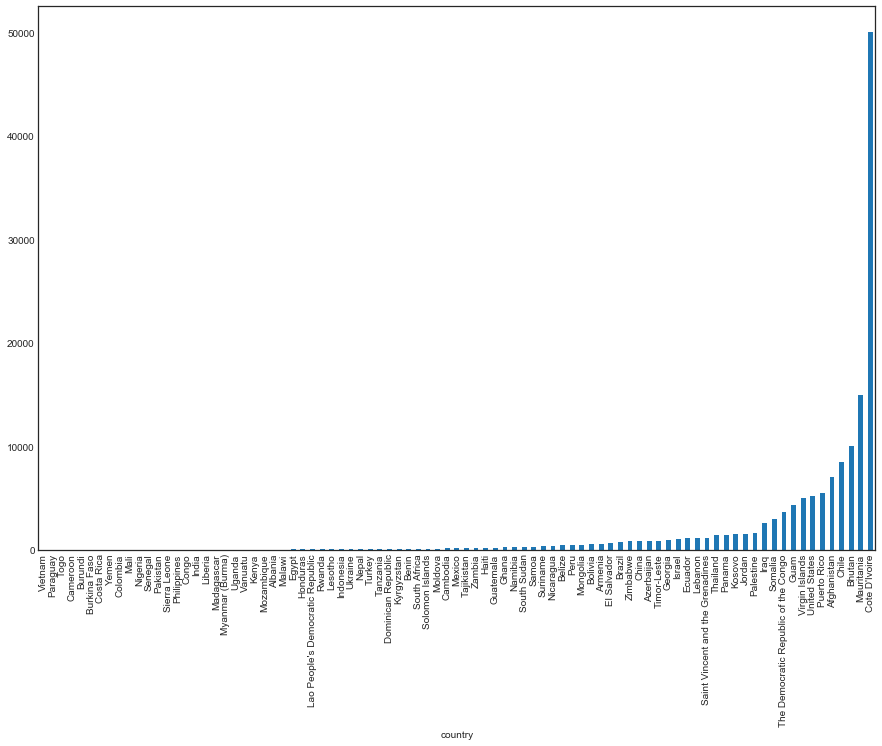

In [341]:
# The average loan for individual per country 
avg_of_loanees= df_co_loan.groupby('country')['Loan_amount_in_USD'].mean()
avg_of_loanees.sort_values(ascending=True).plot.bar(figsize=(15,10))

### ` The average  Loan distributed to individual  based on the country of the loanees. The following is the top 5 countries that Kiva have invested.`
- Cote D'ivoire
- Mauritania
- Bhutan
- Chile
- Afghanstan

### <font color ='green'> 2. WORLD REGION ANALYSIS AND THE THEME FOR THE LOANEES BASED ON THE REGION. 

In [264]:
df24=pd.merge(df2,df4)
df24.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon,Partner ID,...,Loan Theme Type,forkiva,geocode_old,number,amount,geocode,names,mpi_region,mpi_geo,rural_pct
0,"Rio de Janeiro, Brazil",BRA,Brazil,Rio de Janeiro,Latin America and Caribbean,0.011,"(-22.9068467, -43.1728965)",-22.906847,-43.172897,225,...,Artisan,No,NaN,6,6900,"[(-22.9068467, -43.1728965)]",Rio de Janeiro; Rio de Janeiro; State of Rio d...,"Rio de Janeiro, Brazil","(-22.9068467, -43.1728965)",0.0
1,"Thimphu, Bhutan",BTN,Bhutan,Thimphu,South Asia,0.016,"(27.4727924, 89.6392863)",27.472792,89.639286,534,...,Artisan,No,NaN,2,20000,"[(27.4727924, 89.6392863)]",Thimphu; Thimphu; Bhutan,"Thimphu, Bhutan","(27.4727924, 89.6392863)",NaN
2,"Douala, Cameroon",CMR,Cameroon,Douala,Sub-Saharan Africa,0.024,"(4.0510564, 9.7678687)",4.051056,9.767869,217,...,Extreme Poverty,No,NaN,127,54575,"[(4.0510564, 9.7678687)]",Douala; Wouri; Littoral; Cameroon,"Douala, Cameroon","(4.0510564, 9.7678687)",32.0
3,"Douala, Cameroon",CMR,Cameroon,Douala,Sub-Saharan Africa,0.024,"(4.0510564, 9.7678687)",4.051056,9.767869,217,...,Agriculture,No,NaN,3,1500,"[(4.0510564, 9.7678687)]",Douala; Wouri; Littoral; Cameroon,"Douala, Cameroon","(4.0510564, 9.7678687)",32.0
4,"Chimaltenango, Guatemala",GTM,Guatemala,Chimaltenango,Latin America and Caribbean,0.082,"(14.6631591, -90.8246386)",14.663159,-90.824639,55,...,General,No,"(14.6666667, -90.9166667)",214,86300,"[(14.6631591, -90.8246386)]",Chimaltenango; Chimaltenango Department; Guate...,"Chimaltenango, Guatemala","(14.6631591, -90.8246386)",60.0


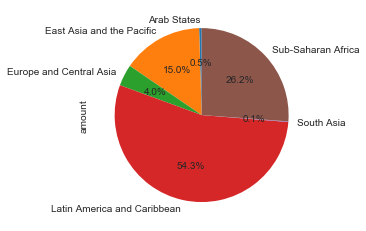

In [357]:
world_region_amount=df24.groupby('world_region')['amount'].sum()
world_region_amount.plot.pie(startangle=90, autopct='%.1f%%')

Based on the above representation the highest proportion is in Latin American, Sub saharan Africa and East Asia Kiva contributing over 95% of the amount in the world region.

In [368]:
Loan_theme_amount=df24.groupby('Loan Theme Type')['amount'].sum()
Loan_theme_amount.sort_values(ascending =False).head(5)

Loan Theme Type
General                6977625
Water                  1424200
Agriculture            1130675
Higher Education        922325
Women Entrepreneurs     853050
Name: amount, dtype: int64

`The average  Global Multidimensional Poverty Index based on the country rating from the highest to the lowest being Brazil`

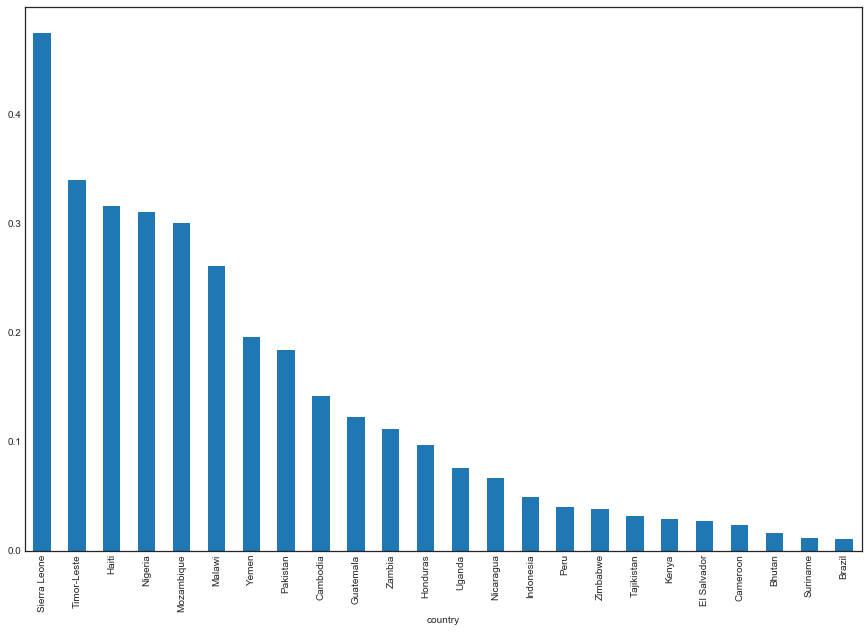

In [379]:
df24.groupby('country')['MPI'].mean().sort_values(ascending =False).plot.bar(figsize=(15,10))